# Summer Olympics Data Analysis Assignment

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('summer.csv')

In [3]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [4]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

### 1. In how many cities Summer Olympics is held so far?

In [5]:
print('Summer Olympics have been held in ' , len(df['City'].unique()) , ' different cities.')

Summer Olympics have been held in  22  different cities.


### 2. Which sport is having most number of Gold Medals so far? (Top 5)

Sports with most number of Gold Medals :
         Sport  Gold Medals
0     Aquatics         1421
1    Athletics         1215
17      Rowing          890
4   Gymnastics          820
3      Fencing          552


<AxesSubplot:xlabel='Sport'>

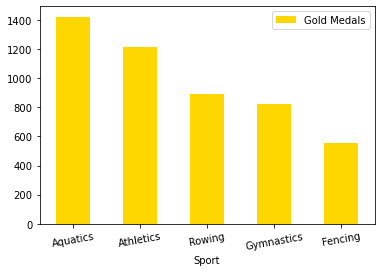

In [6]:
gold = df[df['Medal'] == 'Gold']

data = []

for sport in gold['Sport'].unique():
    data.append([sport , len(gold[gold['Sport'] == sport])])
    
print('Sports with most number of Gold Medals :')
print(pd.DataFrame(data , columns = ['Sport' , 'Gold Medals']).sort_values(by = 'Gold Medals' , ascending = False).head())    
    
pd.DataFrame(data , columns = ['Sport' , 'Gold Medals']).sort_values(by = 'Gold Medals' , ascending = False).head().plot.bar(x = 'Sport' , y = 'Gold Medals' , color = 'gold' , rot = 10)

### 3. Which sport is having most number of medals so far? (Top 5)

Sports with most number of Medals :
         Sport  Medals
0     Aquatics    4170
1    Athletics    3638
17      Rowing    2667
4   Gymnastics    2307
3      Fencing    1613


<AxesSubplot:xlabel='Sport'>

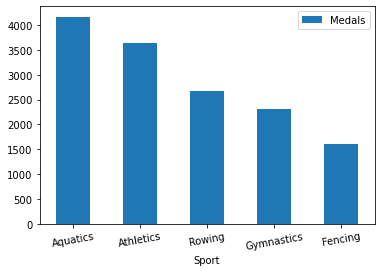

In [7]:
data =[]

for sport in df['Sport'].unique():
    data.append([sport , len(df[df['Sport'] == sport])])

print('Sports with most number of Medals :')
print(pd.DataFrame(data , columns = ['Sport' , 'Medals']).sort_values(by = 'Medals' , ascending = False).head())

pd.DataFrame(data , columns = ['Sport' , 'Medals']).sort_values(by = 'Medals' , ascending = False).head().plot.bar(x = 'Sport' , y = 'Medals' , rot = 10)

### 4. Which player has won most number of medals? (Top 5)

Players with most number of Medals :
Athlete
PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
ONO, Takashi            13
Name: Medal, dtype: int64


<AxesSubplot:xlabel='Athlete'>

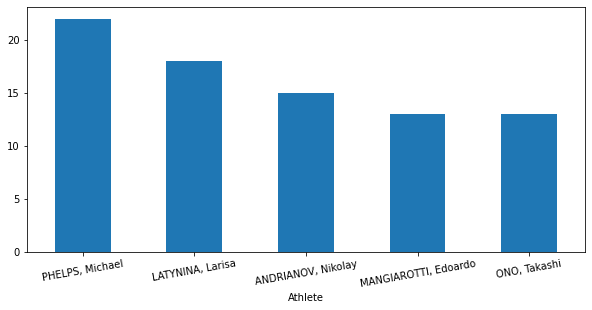

In [8]:
ans = df.groupby('Athlete').count()['Medal'].sort_values(ascending = False).head()

print('Players with most number of Medals :')
print(ans)

ans.plot.bar(x = 'Athlete' , y = 'Medals' , rot = 10 , figsize = (10,4.5))

### 5. Which player has won most number Gold Medals of medals? (Top 5)

Players with most number of Gold Medals :
Athlete
PHELPS, Michael     18
LEWIS, Carl          9
NURMI, Paavo         9
SPITZ, Mark          9
LATYNINA, Larisa     9
Name: Medal, dtype: int64


<AxesSubplot:xlabel='Athlete'>

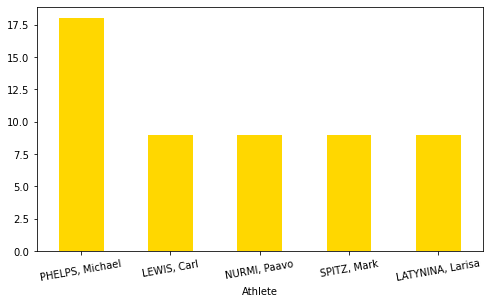

In [9]:
ans = df[df['Medal'] == 'Gold'].groupby('Athlete').count()['Medal'].sort_values(ascending = False).head()

print('Players with most number of Gold Medals :')
print(ans)

ans.plot.bar(x = 'Athlete' , y = 'Gold Medals' , color = 'gold' , rot = 10 , figsize = (8,4.5))

### 6. In which year India won first Gold Medal in Summer Olympics?

In [10]:
data = df[df['Medal'] == 'Gold'].sort_values(by = 'Year' , ascending = True).values

for i in range(len(data)):
    if data[i][5] == 'IND':
        print('India won first Gold Medal in : ' , data[i][0])
        break

India won first Gold Medal in :  1928


### 7. Which event is most popular in terms on number of players? (Top 5)

Most popular event in terms of number of players :
                Event  No. of Players
80           Football            1497
176            Hockey            1422
138  Team Competition            1147
327        Basketball            1012
337          Handball             973


<AxesSubplot:xlabel='Event'>

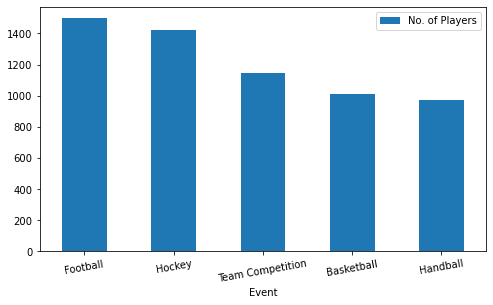

In [11]:
data =[]

for event in df['Event'].unique():
    data.append([event , len(df[df['Event'] == event])])

print('Most popular event in terms of number of players :')
print(pd.DataFrame(data , columns = ['Event' , 'No. of Players']).sort_values(by = 'No. of Players' , ascending = False).head())    
    
pd.DataFrame(data , columns = ['Event' , 'No. of Players']).sort_values(by = 'No. of Players' , ascending = False).head().plot.bar(x = 'Event' , y = 'No. of Players' , rot = 10 , figsize = (8,4.5))

### 8. Which sport is having most female Gold Medalists? (Top 5)

Sports with most Female Gold Medalists :
Sport
Aquatics      589
Athletics     389
Gymnastics    268
Rowing        217
Volleyball    166
Name: Athlete, dtype: int64


<AxesSubplot:xlabel='Sport'>

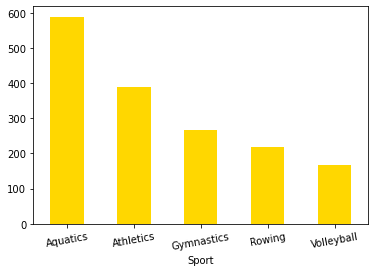

In [12]:
gold = df[df['Medal'] == 'Gold']

print('Sports with most Female Gold Medalists :')
print(gold[gold['Gender'] == 'Women'].groupby('Sport').count()['Athlete'].sort_values(ascending = False).head())

gold[gold['Gender'] == 'Women'].groupby('Sport').count()['Athlete'].sort_values(ascending = False).head().plot.bar(x = 'Sport' , y = 'Female Gold Medalists' , color = 'gold' , rot = 10)